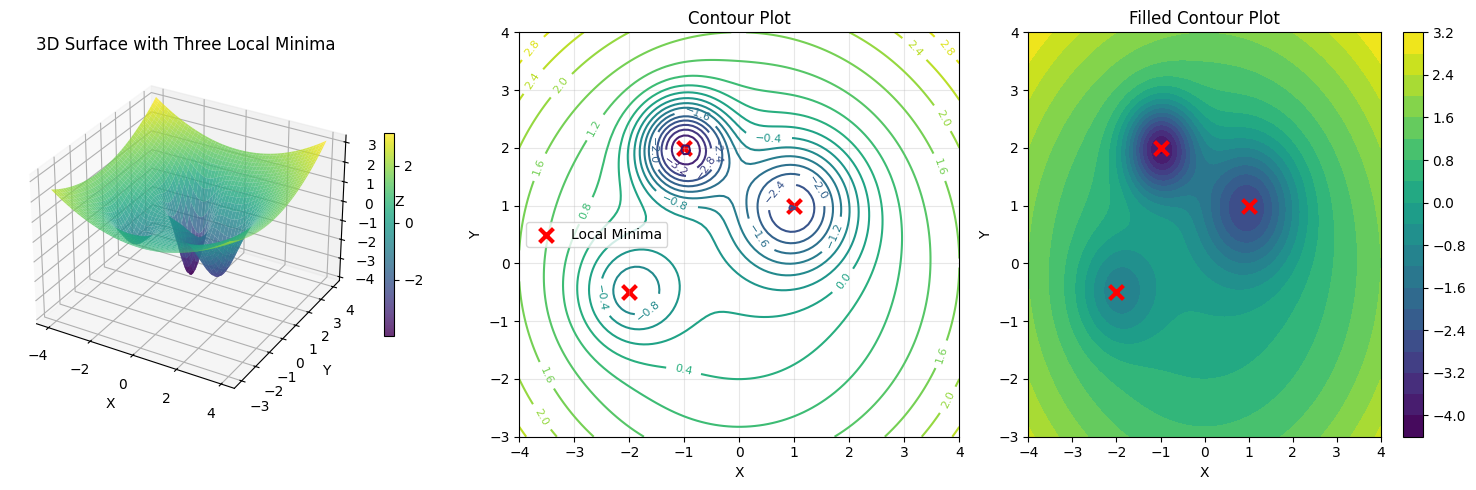

Local Minima Information:
Minimum 1 at (-2, -0.5): depth = -1.075
Minimum 2 at (1, 1): depth = -2.801
Minimum 3 at (-1, 2): depth = -4.047


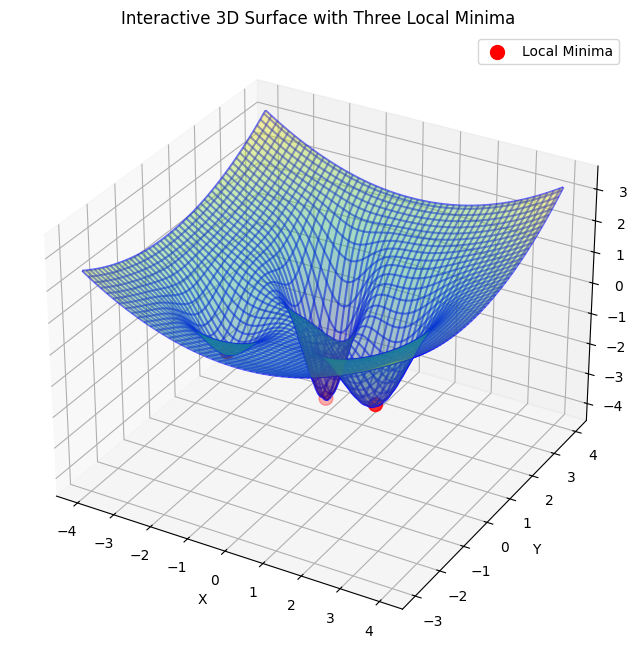

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def surface_with_three_minima(x, y):

    # x, y: numpy arrays representing the coordinate grids
    
    # Returns:
    # z: numpy array representing the surface heights
    
    # Define three minima with different positions, depths, and widths
    # Minimum 1: shallow minimum at (-2, -0.5)
    z1 = -1.5 * np.exp(-((x + 2)**2 + (y + 0.5)**2) / 0.8)
    
    # Minimum 2: medium depth minimum at (1, 1)
    z2 = -3.0 * np.exp(-((x - 1)**2 + (y - 1)**2) / 1.2)
    
    # Minimum 3: deep minimum at (-1, 2)
    z3 = -4.5 * np.exp(-((x + 1)**2 + (y - 2)**2) / 0.6)
    
    # Upward trend 
    base_surface = 0.1 * (x**2 + y**2)
    
    # Combine all components
    z = base_surface + z1 + z2 + z3
    
    return z

# Create coordinate grids
x_range = np.linspace(-4, 4, 100)
y_range = np.linspace(-3, 4, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the surface
Z = surface_with_three_minima(X, Y)

# Create the visualization
fig = plt.figure(figsize=(15, 5))

# 3D Surface Plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, 
                       linewidth=0, antialiased=True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Surface with Three Local Minima')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour Plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Contour Plot')
ax2.grid(True, alpha=0.3)

# Mark the minima locations
minima_x = [-2, 1, -1]
minima_y = [-0.5, 1, 2]

# Calculate Z values using the CORRECT coordinates
minima_z = [surface_with_three_minima(np.array([-2]), np.array([-0.5]))[0],   # Fixed: -0.5 instead of -1
            surface_with_three_minima(np.array([1]), np.array([1]))[0],       # Fixed: 1 instead of 2
            surface_with_three_minima(np.array([-1]), np.array([2]))[0]]      # This was already correct

ax2.scatter(minima_x, minima_y, c='red', s=100, marker='x', linewidth=3, 
           label='Local Minima')
ax2.legend()

# Filled Contour Plot
ax3 = fig.add_subplot(133)
filled_contour = ax3.contourf(X, Y, Z, levels=20, cmap='viridis')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Filled Contour Plot')
fig.colorbar(filled_contour, ax=ax3)
ax3.scatter(minima_x, minima_y, c='red', s=100, marker='x', linewidth=3)

plt.tight_layout()
plt.show()

# Print the depths of the minima with CORRECT positions
print("Local Minima Information:")
print(f"Minimum 1 at (-2, -0.5): depth = {minima_z[0]:.3f}")  # Updated position
print(f"Minimum 2 at (1, 1): depth = {minima_z[1]:.3f}")      # Updated position
print(f"Minimum 3 at (-1, 2): depth = {minima_z[2]:.3f}")

# Optional: Create an interactive 3D plot if you want to rotate and zoom
fig_interactive = plt.figure(figsize=(10, 8))
ax_interactive = fig_interactive.add_subplot(111, projection='3d')

# Use a wireframe for better visibility of the surface structure
wire = ax_interactive.plot_wireframe(X, Y, Z, alpha=0.6, color='blue')
surf_interactive = ax_interactive.plot_surface(X, Y, Z, cmap='viridis', 
                                              alpha=0.4, linewidth=0)

# Mark the minima in 3D - now the red dots will be at the correct positions!
ax_interactive.scatter(minima_x, minima_y, minima_z, c='red', s=100, 
                      marker='o', label='Local Minima')

ax_interactive.set_xlabel('X')
ax_interactive.set_ylabel('Y')
ax_interactive.set_zlabel('Z')
ax_interactive.set_title('Interactive 3D Surface with Three Local Minima')
ax_interactive.legend()

plt.show()